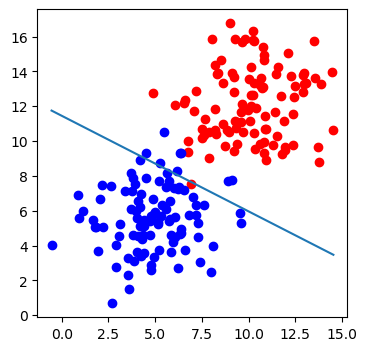

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def draw(x1, x2):
    ln = plt.plot(x1, x2, '-')
    
def sigmoid(score):
    return 1/(1+np.exp(-score))

def calc_error(line_params, pts, y):
    m = pts.shape[0]
    p = sigmoid(pts*line_params)
    cross_entropy = -(1/m)* (np.log(p).T*y + np.log(1-p).T*(1-y))
    return cross_entropy

def grad_desc(line_params, pts, y, alpha): # alpha = learning rate
    m = pts.shape[0]
    for i in range(500): # 500 epochs
        p = sigmoid(pts*line_params)
        gradient = pts.T * (p-y) * alpha / m
        line_params = line_params - gradient
        w1 = line_params.item(0)
        w2 = line_params.item(1)
        b = line_params.item(2)
        
        # x1 is x coordinates for (point 1, point 2)
        x1 = np.array([pts[:,0].min(), pts[:,0].max()])
        # w1x1 + w2x2 + b = 0 
        # rearrange for x2
        x2 = -b / w2 + x1*(-w1/w2)
    
    draw(x1, x2)
        
    

n_pts = 100
np.random.seed(0)

bias = np.ones(n_pts)

random_x1_vals = np.random.normal(10, 2, n_pts)
random_x2_vals = np.random.normal(12, 2, n_pts)
top_region = np.array([random_x1_vals, random_x2_vals, bias]).T
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T

all_pts = np.vstack((top_region, bottom_region))

# initializing w1, w2 and b
line_params = np.matrix([np.zeros(3)]).T

# 0/1 labels for all points
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
grad_desc(line_params, all_pts, y, 0.06)
plt.show()